### 專案名稱: 第四屆機器學習百日馬拉松
### 功能描述: 第59天作業
### 版權所有: Dunk  
### 程式撰寫: Dunk  
### 撰寫日期：2020/05/15
### 改版日期:  
### 改版備註:

# 作業
### 用 digits (3個數字即可 , dataset.load_digits(n_class=3)) 資料嘗試跑 PCA


In [30]:
from sklearn import datasets

digits = datasets.load_digits(n_class=3)
X = digits.data
y = digits.target
print(X.shape)
print(y.shape)

(537, 64)
(537,)


載入 相關套件 並 執行 PCA 實驗 ...

### ANS:

#### 參考資料
[PCA函式用法](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html "PCA函式用法")

查看統計值

In [31]:
import pandas as pd
pd.DataFrame(X).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,537.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,537.0,0.318436,0.900402,0.0,0.0,0.0,0.0,5.0
2,537.0,5.405959,4.846429,0.0,1.0,4.0,9.0,16.0
3,537.0,12.137803,4.614586,0.0,11.0,14.0,15.0,16.0
4,537.0,10.445065,4.510897,0.0,8.0,12.0,14.0,16.0
...,...,...,...,...,...,...,...,...
59,537.0,12.195531,4.645345,0.0,11.0,14.0,16.0,16.0
60,537.0,13.156425,3.050832,0.0,12.0,14.0,16.0,16.0
61,537.0,8.597765,5.564600,0.0,4.0,8.0,14.0,16.0
62,537.0,3.769088,5.596069,0.0,0.0,0.0,7.0,16.0


In [32]:
pd.DataFrame(y).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,537.0,0.998138,0.813824,0.0,0.0,1.0,2.0,2.0


載入套件

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)
%matplotlib inline

設定 模型 估計參數

In [34]:
centers = [[1, 1], [-1, -1], [1, -1]]
pca = decomposition.PCA(n_components=3)

資料建模 並 視覺化 結果

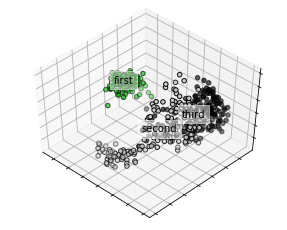

In [35]:
pca.fit(X)
X = pca.transform(X)

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()


for name, label in [('first', 0), ('second', 1), ('third', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()